# Parte 2 - Alterazione e unione di datasets

### Alterazione:

## Esercizio 2:
- Importare Pandas
- Caricare il dataset avocado
- Creare un subset del dataset chiamato "organic_avocado_df" dove la colonna "type" è di tipo "organic"
- Ordinare il dataset in base alla data [Suggerimento: utilizzate il metodo **sort_values(by="Nome colonna", ascending=True)**]

In [1]:
import pandas as pd

In [2]:
organic_avocado_df = pd.read_csv("../datasets/avocado.csv")
organic_avocado_df = organic_avocado_df[organic_avocado_df["type"]=="organic"]
organic_avocado_df.sort_values(by="Date", ascending=True, inplace=True)

Creiamo un nuovo dataframe dove per ogni colonna avremo tutte le "region" e ogni riga rappresenterà la media mobile creata precedentemente per un ogni giorno:

es:

    California | Florida | New York
2015&emsp;&emsp;&emsp;1.4&emsp;&emsp;&emsp;&emsp;1.8&emsp;&emsp;&emsp;&emsp;2 <br>
2016&emsp;&emsp;&emsp;1.3&emsp;&emsp;&emsp;&emsp;1.7&emsp;&emsp;&emsp;&emsp;2 <br>

In [3]:
media_mobile_df = pd.DataFrame()

for region in organic_avocado_df["region"].unique():
    #print(region)
    region_df = organic_avocado_df[organic_avocado_df["region"] == region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[region] = region_df["AveragePrice"].rolling(25).mean()
    
    #print(region_df.tail())
    
    if media_mobile_df.empty:
        media_mobile_df = region_df[[region]] #.. , [], []
    else:
        media_mobile_df = media_mobile_df.join(region_df[region])

/var/folders/lr/d8nq9v9x525g290h3kqjrbgw0000gn/T/ipykernel_96064/3799693415.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df[region] = region_df["AveragePrice"].rolling(25).mean()


In [4]:
media_mobile_df.tail()

,California,LasVegas,PhoenixTucson,BuffaloRochester,Spokane,LosAngeles,Philadelphia,Boston,StLouis,Louisville,...,Houston,Chicago,Plains,Indianapolis,SouthCentral,Columbus,Albany,Detroit,NewOrleansMobile,NewYork
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


<AxesSubplot:xlabel='Date'>

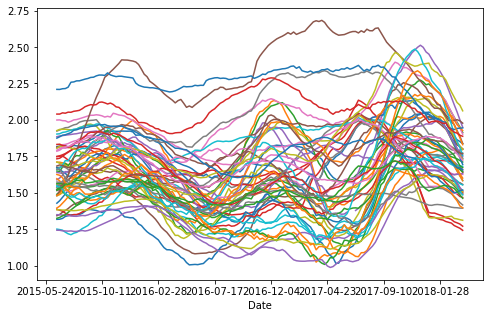

In [5]:
media_mobile_df.plot(figsize=(8,5), legend=False)

## Esercizio 3:
- Convertire la colonna "Date" da stringa a datetime (Suggerimento: Nel notebook precedente abbiamo convertito l'index e non una colonna)

In [6]:
organic_avocado_df["Date"] = pd.to_datetime(organic_avocado_df["Date"])
#df_avocado["price25ma"] = df_avocado["AveragePrice"].rolling(25).mean()

**Problema:** Per l'analisi che andremo a fare ci servirà il dataset contentete come region solo gli stati!

In [7]:
organic_avocado_df["region"].unique()

array(['California', 'LasVegas', 'PhoenixTucson', 'BuffaloRochester',
       'Spokane', 'LosAngeles', 'Philadelphia', 'Boston', 'StLouis',
       'Louisville', 'Orlando', 'Southeast', 'Boise', 'MiamiFtLauderdale',
       'NorthernNewEngland', 'BaltimoreWashington', 'Midsouth', 'Tampa',
       'West', 'Northeast', 'Atlanta', 'Nashville', 'TotalUS', 'Syracuse',
       'WestTexNewMexico', 'Jacksonville', 'Charlotte', 'Sacramento',
       'GrandRapids', 'Roanoke', 'Denver', 'SanDiego', 'GreatLakes',
       'RichmondNorfolk', 'DallasFtWorth', 'SanFrancisco',
       'HarrisburgScranton', 'Pittsburgh', 'RaleighGreensboro', 'Seattle',
       'HartfordSpringfield', 'Portland', 'CincinnatiDayton',
       'SouthCarolina', 'Houston', 'Chicago', 'Plains', 'Indianapolis',
       'SouthCentral', 'Columbus', 'Albany', 'Detroit',
       'NewOrleansMobile', 'NewYork'], dtype=object)

In alcuni casi abbiamo il nome della città, in altri casi abbiamo lo stato, in altri casi nome + stato, etc.. <br>
Non mi basta mantenere solo gli stati, le colonne stato sono troppo poche

Passi che andremo a compiere:
1) Separare i nomi uniti
2) Mappare le città con il proprio stato
3) Raggruppare le città nel proprio stato

### Passo 1: 
#### Separare i nomi uniti

In [8]:
import re

nomi_nuovi = []

for row in organic_avocado_df.itertuples():
    nomi_nuovi.append(" ".join(re.findall('[A-Z][^A-Z]*', row[-1])))

organic_avocado_df["region"] = nomi_nuovi
organic_avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.0,organic,2015,Las Vegas
10893,51,2015-01-04,1.12,17296.85,14569.66,1868.59,0.00,858.60,830.00,28.60,0.0,organic,2015,Phoenix Tucson
9437,51,2015-01-04,1.73,379.82,0.00,59.82,0.00,320.00,320.00,0.00,0.0,organic,2015,Buffalo Rochester
11621,51,2015-01-04,1.30,5782.70,723.29,4221.15,0.00,838.26,223.33,614.93,0.0,organic,2015,Spokane


In [9]:
organic_avocado_df["region"].unique()

array(['California', 'Las Vegas', 'Phoenix Tucson', 'Buffalo Rochester',
       'Spokane', 'Los Angeles', 'Philadelphia', 'Boston', 'St Louis',
       'Louisville', 'Orlando', 'Southeast', 'Boise',
       'Miami Ft Lauderdale', 'Northern New England',
       'Baltimore Washington', 'Midsouth', 'Tampa', 'West', 'Northeast',
       'Atlanta', 'Nashville', 'Total U S', 'Syracuse',
       'West Tex New Mexico', 'Jacksonville', 'Charlotte', 'Sacramento',
       'Grand Rapids', 'Roanoke', 'Denver', 'San Diego', 'Great Lakes',
       'Richmond Norfolk', 'Dallas Ft Worth', 'San Francisco',
       'Harrisburg Scranton', 'Pittsburgh', 'Raleigh Greensboro',
       'Seattle', 'Hartford Springfield', 'Portland', 'Cincinnati Dayton',
       'South Carolina', 'Houston', 'Chicago', 'Plains', 'Indianapolis',
       'South Central', 'Columbus', 'Albany', 'Detroit',
       'New Orleans Mobile', 'New York'], dtype=object)

### Passo 2:
#### Mappare le città con il proprio stato<br>
Colleghiamoci a questo [sito](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population)!

In [10]:
citta_us = pd.read_html("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")[4]
citta_us

[     Rank           Name        State  2022 Pop.  2010 Census  Change  \
 0       1  New York City     New York    8177025      8190209  -0.16%   
 1       2    Los Angeles   California    3985516      3795512   5.01%   
 2       3        Chicago     Illinois    2671635      2697477  -0.96%   
 3       4        Houston        Texas    2325353      2100280  10.72%   
 4       5        Phoenix      Arizona    1759943      1449038  21.46%   
 ..    ...            ...          ...        ...          ...     ...   
 195   196           Waco        Texas     143286       125377  14.28%   
 196   197     Bridgeport  Connecticut     143280       144864  -1.09%   
 197   198        Miramar      Florida     143072       122300  16.98%   
 198   199         Olathe       Kansas     142906       126269  13.18%   
 199   200       Metairie    Louisiana     142135       138481   2.64%   
 
      Density (mi²)  Area (mi²)  
 0            27222      300.38  
 1             8499      468.96  
 2      

In [ ]:
city = []

for row in citta_us.itertuples():
    city.append(str(row[2]).split("[")[0].strip())

city
citta_us["City"] = city
citta_us.head()

Quali colonne ci interessano?

In [11]:
citta_us = citta_us[["City", "State[c]"]]

In [12]:
citta_us

,Name,State
0,New York City,New York
1,Los Angeles,California
2,Chicago,Illinois
3,Houston,Texas
4,Phoenix,Arizona
...,...,...
195,Waco,Texas
196,Bridgeport,Connecticut
197,Miramar,Florida
198,Olathe,Kansas


In [13]:
citta_us.set_index("City", inplace=True)
citta_us.head()

,State
Name,
New York City,New York
Los Angeles,California
Chicago,Illinois
Houston,Texas
Phoenix,Arizona


In [14]:
citta_us_dict = citta_us["State[c]"].to_dict()
citta_us_dict

{'New York City': 'New York',
 'Los Angeles': 'California',
 'Chicago': 'Illinois',
 'Houston': 'Texas',
 'Phoenix': 'Arizona',
 'San Antonio': 'Texas',
 'Philadelphia': 'Pennsylvania',
 'San Diego': 'California',
 'Dallas': 'Texas',
 'Austin': 'Texas',
 'San Jose': 'California',
 'Fort Worth': 'Texas',
 'Jacksonville': 'Florida',
 'Charlotte': 'North Carolina',
 'Columbus': 'Georgia',
 'Indianapolis': 'Indiana',
 'San Francisco': 'California',
 'Seattle': 'Washington',
 'Denver': 'Colorado',
 'Washington': 'District of Columbia',
 'Boston': 'Massachusetts',
 'El Paso': 'Texas',
 'Nashville': 'Tennessee',
 'Oklahoma City': 'Oklahoma',
 'Las Vegas': 'Nevada',
 'Portland': 'Oregon',
 'Detroit': 'Michigan',
 'Memphis': 'Tennessee',
 'Louisville': 'Kentucky',
 'Milwaukee': 'Wisconsin',
 'Baltimore': 'Maryland',
 'Albuquerque': 'New Mexico',
 'Tucson': 'Arizona',
 'Mesa': 'Arizona',
 'Fresno': 'California',
 'Atlanta': 'Georgia',
 'Sacramento': 'California',
 'Kansas City': 'Kansas',
 'Colo

Dobbiamo iterare ogni città nel dataset e ottenere dal dizionario lo stato corrispondente

In [15]:
citta_us_list = [citta_us_dict[c] for c in organic_avocado_df["region"]]
citta_us_list

KeyError: 'California'

**Problema**: <br>
'California'
'New York'
'Midsouth'
'West'
'Northeast'
'Total US'
'South Carolina'
'SouthCentral'
'West Tex New Mexico'
'Northern New England'

In [16]:
organic_avocado_df = organic_avocado_df.drop(organic_avocado_df[(organic_avocado_df['region'] == "California") | 
                                        (organic_avocado_df['region'] == "New York") | 
                                        (organic_avocado_df['region'] == "Midsouth") | 
                                        (organic_avocado_df['region'] == "West") |
                                        (organic_avocado_df['region'] == "Northeast") |
                                        (organic_avocado_df['region'] == "Southeast") |
                                        (organic_avocado_df['region'] == "Total U S") |
                                        (organic_avocado_df['region'] == "South Carolina") |
                                        (organic_avocado_df['region'] == "South Central") |
                                        (organic_avocado_df['region'] == "West Tex New Mexico") |
                                        (organic_avocado_df['region'] == "Great Lakes") |
                                        (organic_avocado_df['region'] == "Northern New England")].index)

In [17]:
organic_avocado_df["region"].unique()

array(['Las Vegas', 'Phoenix Tucson', 'Buffalo Rochester', 'Spokane',
       'Los Angeles', 'Philadelphia', 'Boston', 'St Louis', 'Louisville',
       'Orlando', 'Boise', 'Miami Ft Lauderdale', 'Baltimore Washington',
       'Tampa', 'Atlanta', 'Nashville', 'Syracuse', 'Jacksonville',
       'Charlotte', 'Sacramento', 'Grand Rapids', 'Roanoke', 'Denver',
       'San Diego', 'Richmond Norfolk', 'Dallas Ft Worth',
       'San Francisco', 'Harrisburg Scranton', 'Pittsburgh',
       'Raleigh Greensboro', 'Seattle', 'Hartford Springfield',
       'Portland', 'Cincinnati Dayton', 'Houston', 'Chicago', 'Plains',
       'Indianapolis', 'Columbus', 'Albany', 'Detroit',
       'New Orleans Mobile'], dtype=object)

# Potrei sistemare il dataset manualmente
**Problema**: <br>
'Phoenix Tucson'
'Buffalo Rochester'
'St Louis'
'Miami Ft Lauderdale'
'Baltimore Washington'
'Richmond Norfolk'
'Dallas Ft Worth'
'Harrisburg Scranton'
'Raleigh Greensboro'
'Hartford Springfield'
'Cincinnati Dayton',
'New Orleans Mobile'

In [18]:
organic_avocado_df.loc[organic_avocado_df['region'] == 'Phoenix Tucson', 'region'] = 'Phoenix'
organic_avocado_df.loc[organic_avocado_df['region'] == 'Buffalo Rochester', 'region'] = 'Buffalo'
organic_avocado_df.loc[organic_avocado_df['region'] == 'St Louis', 'region'] = 'St. Louis'
organic_avocado_df.loc[organic_avocado_df['region'] == 'Miami Ft Lauderdale', 'region'] = 'Miami'
organic_avocado_df.loc[organic_avocado_df['region'] == 'Baltimore Washington', 'region'] = 'Baltimore'
organic_avocado_df.loc[organic_avocado_df['region'] == 'Richmond Norfolk', 'region'] = 'Richmond'
organic_avocado_df.loc[organic_avocado_df['region'] == 'Harrisburg Scranton', 'region'] = 'Harrisburg'
organic_avocado_df.loc[organic_avocado_df['region'] == 'Raleigh Greensboro', 'region'] = 'Raleigh'
organic_avocado_df.loc[organic_avocado_df['region'] == 'Hartford Springfield', 'region'] = 'Hartford'
organic_avocado_df.loc[organic_avocado_df['region'] == 'Cincinnati Dayton', 'region'] = 'Cincinnati'
organic_avocado_df.loc[organic_avocado_df['region'] == 'New Orleans Mobile', 'region'] = 'New Orleans'
organic_avocado_df.loc[organic_avocado_df['region'] == 'Dallas Ft Worth', 'region'] = 'Dallas'

citta_us_dict["Roanoke"] = "North Carolina"
citta_us_dict["Plains"] = "Georgia"
citta_us_dict["Albany"] = "New York"
citta_us_dict["Harrisburg"] = "Pennsylvania"

In [19]:
citta_us_list = [citta_us_dict[c] for c in organic_avocado_df["region"]]
citta_us_list

## Esercizio 4:
- Creare nel dataframe "organic_avocado_df" la colonna "state" e assegnarli la lista appena creata

In [20]:
organic_avocado_df["state"] = citta_us_list
organic_avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,state
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.0,457.12,426.67,30.45,0.0,organic,2015,Las Vegas,Nevada
10893,51,2015-01-04,1.12,17296.85,14569.66,1868.59,0.0,858.60,830.00,28.60,0.0,organic,2015,Phoenix,Arizona
9437,51,2015-01-04,1.73,379.82,0.00,59.82,0.0,320.00,320.00,0.00,0.0,organic,2015,Buffalo,New York
11621,51,2015-01-04,1.30,5782.70,723.29,4221.15,0.0,838.26,223.33,614.93,0.0,organic,2015,Spokane,Washington
10321,51,2015-01-04,1.25,54495.54,47721.51,1723.40,0.0,5050.63,5050.63,0.00,0.0,organic,2015,Los Angeles,California


In [21]:
organic_avocado_df["state"].unique()

array(['Nevada', 'Arizona', 'New York', 'Washington', 'California',
       'Pennsylvania', 'Massachusetts', 'Missouri', 'Kentucky', 'Florida',
       'Idaho', 'Maryland', 'Georgia', 'Tennessee', 'North Carolina',
       'Michigan', 'Colorado', 'Virginia', 'Texas', 'Connecticut',
       'Oregon', 'Ohio', 'Illinois', 'Indiana', 'Louisiana'], dtype=object)

Vogliamo raggruppare gli stati tutti assieme:

In [22]:
organic_avocado_df = organic_avocado_df.groupby(['Date','state']).mean()
organic_avocado_df.tail(25)

Unnamed: 0  AveragePrice  Total Volume  \
Date       state                                                    
2018-03-25 Arizona                0.0      1.520000  15372.800000   
           California             0.0      1.690000  38780.752500   
           Colorado               0.0      1.600000  24825.500000   
           Connecticut            0.0      2.090000  20242.650000   
           Florida                0.0      1.487500   8801.970000   
           Georgia                0.0      1.470000  34674.173333   
           Idaho                  0.0      1.810000   3119.200000   
           Illinois               0.0      1.690000  35088.360000   
           Indiana                0.0      1.280000   9506.070000   
           Kentucky               0.0      1.460000   4173.700000   
           Louisiana              0.0      1.360000   8024.700000   
           Maryland               0.0      1.330000  57606.420000   
           Massachusetts          0.0      1.740000  38441.230000   
           Michigan               0.0      1.385000  14523.360000   
           Missouri               0.0      1.820000   8210.370000   
           Nevada                 0.0      1.650000  10720.470000   
           New York               0.0      1.260000  18343.090000   
           North Carolina         0.0      1.796667  11502.873333   
           Ohio                   0.0      1.660000  15502.380000   
           Oregon                 0.0      1.660000  31275.390000   
           Pennsylvania           0.0      1.410000  25824.853333   
           Tennessee              0.0      1.480000   7250.690000   
           Texas                  0.0      1.385000  34244.495000   
           Virginia               0.0      1.420000  17340.490000   
           Washington             0.0      1.535000  50899.510000   

                                  4046          4225       4770    Total Bags  \
Date       state                                                                
2018-03-25 Arizona         2399.710000   3164.800000   0.000000   9808.290000   
           California      6017.095000  13811.757500   0.000000  18951.900000   
           Colorado        6516.400000    685.920000  44.090000  17579.090000   
           Connecticut      144.400000  10949.630000   0.000000   9148.620000   
           Florida          157.607500    745.802500   0.982500   7897.577500   
           Georgia         1926.310000   8072.816667   0.000000  24675.046667   
           Idaho             76.120000   1006.430000   0.000000   2036.650000   
           Illinois         324.870000  27550.290000   0.000000   7213.200000   
           Indiana          319.390000   1427.130000   0.000000   7685.050000   
           Kentucky           8.000000    988.640000   0.000000   3177.060000   
           Louisiana        275.670000     94.250000   0.000000   7654.780000   
           Maryland        2002.400000   5548.180000  82.680000  49973.160000   
           Massachusetts     27.250000   2031.540000   0.000000  36382.440000   
           Michigan         380.620000   2015.440000   0.000000  12025.680000   
           Missouri        1426.490000   2452.500000   0.000000   4331.380000   
           Nevada          1541.020000   1842.230000   0.000000   7337.220000   
           New York         121.203333    282.030000   0.000000  17939.856667   
           North Carolina    62.420000   4623.820000  86.533333   6730.100000   
           Ohio             728.900000   4308.740000   0.000000  10464.740000   
           Oregon          1746.290000   8110.670000   0.000000  21418.430000   
           Pennsylvania    1597.566667   1995.950000   6.430000  22224.906667   
           Tennessee         43.770000   1759.470000   0.000000   5447.450000   
           Texas           6810.080000    557.625000   0.000000  26876.790000   
           Virginia         295.160000   3478.970000  81.250000  13485.110000   
           Washington      1010.430000  21536.160000  21.

## Esercizio 5:
- Ricreare un dataframe dove per ogni colonna avremo tutti gli "state" e per ogni riga la media mobile:



In [23]:
media_mobile_df = pd.DataFrame()

for state, group in organic_avocado_df.groupby("state"):
    #print(group)
    #break
    group = group.reset_index()
    group[state] = group["AveragePrice"].rolling(25).mean()
    
    if media_mobile_df.empty:
        media_mobile_df = group.set_index("Date")[[state]]
    else:
        media_mobile_df = media_mobile_df.join(group.set_index("Date")[[state]])
        
media_mobile_df.tail(20)

,Arizona,California,Colorado,Connecticut,Florida,Georgia,Idaho,Illinois,Indiana,Kentucky,...,Nevada,New York,North Carolina,Ohio,Oregon,Pennsylvania,Tennessee,Texas,Virginia,Washington
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-12,1.9108,2.1289,1.8460,2.1788,2.0084,1.841200,2.2112,1.9356,1.5052,1.7088,...,2.0040,1.704400,2.151867,1.7964,2.2892,1.677200,1.6752,1.5524,1.7068,2.4414
2017-11-19,1.9092,2.1233,1.8588,2.1556,2.0039,1.843333,2.2364,1.9300,1.5012,1.7208,...,2.0124,1.684000,2.146133,1.7916,2.3180,1.662000,1.6932,1.5698,1.7076,2.4672
2017-11-26,1.9088,2.1215,1.8604,2.1316,1.9890,1.849733,2.2444,1.9216,1.5088,1.7324,...,2.0216,1.653867,2.139333,1.7932,2.3276,1.648667,1.7104,1.5902,1.7020,2.4830
2017-12-03,1.9044,2.1079,1.8532,2.1000,1.9772,1.868400,2.2644,1.9132,1.5320,1.7560,...,2.0144,1.613600,2.138000,1.8312,2.3372,1.626933,1.7280,1.6072,1.6996,2.4842
2017-12-10,1.8976,2.1023,1.8700,2.0868,1.9562,1.877200,2.2728,1.9000,1.5380,1.7700,...,2.0112,1.570000,2.137333,1.8368,2.3232,1.610400,1.7452,1.6186,1.6844,2.4760
2017-12-17,1.8780,2.0916,1.8816,2.0596,1.9346,1.886133,2.2608,1.8764,1.5396,1.7748,...,2.0220,1.525067,2.138800,1.8476,2.2912,1.590533,1.7592,1.6248,1.6760,2.4408
2017-12-24,1.8616,2.0810,1.8884,2.0324,1.9193,1.890400,2.2416,1.8696,1.5352,1.7876,...,2.0284,1.483733,2.133067,1.8656,2.2716,1.568800,1.7736,1.6400,1.6588,2.4130
2017-12-31,1.8564,2.0683,1.8700,2.0016,1.9107,1.882933,2.2472,1.8616,1.5380,1.7696,...,2.0176,1.441867,2.128000,1.8684,2.2656,1.545867,1.7748,1.6540,1.6420,2.3878
2018-01-07,1.8444,2.0626,1.8520,2.0052,1.9007,1.869600,2.2276,1.8616,1.5372,1.7628,...,2.0112,1.434933,2.100800,1.8640,2.2360,1.545467,1.7760,1.6526,1.6208,2.3446


In [24]:
media_mobile_df.head()

,Arizona,California,Colorado,Connecticut,Florida,Georgia,Idaho,Illinois,Indiana,Kentucky,...,Nevada,New York,North Carolina,Ohio,Oregon,Pennsylvania,Tennessee,Texas,Virginia,Washington
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
media_mobile_df.dropna().head()

,Arizona,California,Colorado,Connecticut,Florida,Georgia,Idaho,Illinois,Indiana,Kentucky,...,Nevada,New York,North Carolina,Ohio,Oregon,Pennsylvania,Tennessee,Texas,Virginia,Washington
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-21,1.4896,1.4381,1.3172,2.2096,1.7624,1.669333,1.6488,1.6832,1.6620,1.5508,...,1.5576,1.785067,1.653333,1.3244,1.4812,1.721867,1.5960,1.2958,1.3856,1.6242
2015-06-28,1.5064,1.4564,1.3180,2.2092,1.7660,1.666400,1.6464,1.6908,1.6600,1.5512,...,1.5592,1.791333,1.649733,1.3304,1.4912,1.725733,1.5812,1.2952,1.3800,1.6348
2015-07-05,1.5208,1.4795,1.3236,2.2140,1.7655,1.660133,1.6760,1.6860,1.6312,1.5392,...,1.5616,1.801600,1.644533,1.3412,1.5196,1.736000,1.5536,1.2924,1.3732,1.6546
2015-07-12,1.5392,1.5018,1.3372,2.2152,1.7633,1.646800,1.7004,1.6800,1.6004,1.5268,...,1.5800,1.810533,1.637067,1.3488,1.5428,1.739867,1.5324,1.2916,1.3596,1.6828
2015-07-19,1.5516,1.5266,1.3420,2.2248,1.7526,1.636933,1.6856,1.6728,1.5688,1.5068,...,1.5904,1.821200,1.626667,1.3648,1.5436,1.745200,1.5132,1.2900,1.3508,1.6794


Osserviamo i risultati:

<AxesSubplot:xlabel='Date'>

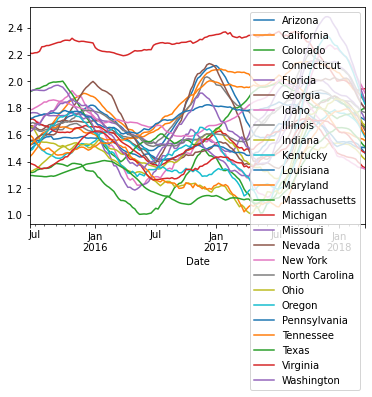

In [26]:
media_mobile_df.dropna().plot()

Meglio togliere la legenda

<AxesSubplot:xlabel='Date'>

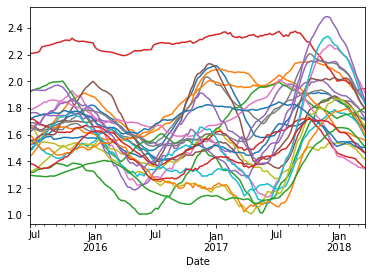

In [27]:
media_mobile_df.dropna().plot(legend=False)

In [28]:
media_mobile_df.describe()

,Arizona,California,Colorado,Connecticut,Florida,Georgia,Idaho,Illinois,Indiana,Kentucky,...,Nevada,New York,North Carolina,Ohio,Oregon,Pennsylvania,Tennessee,Texas,Virginia,Washington
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.749277,1.884754,1.350428,2.254262,1.717317,1.581486,1.608168,1.752406,1.473051,1.453073,...,1.761523,1.718779,1.738770,1.395291,1.598714,1.721674,1.384618,1.288114,1.464480,1.767098
std,0.163460,0.191785,0.243139,0.109287,0.159410,0.156170,0.322270,0.133429,0.088961,0.172279,...,0.222347,0.149826,0.204385,0.234338,0.314033,0.090638,0.214873,0.171479,0.129394,0.299558
min,1.482000,1.438100,1.004400,1.933600,1.470300,1.348000,1.133200,1.535200,1.271600,1.142400,...,1.386800,1.343467,1.513600,1.007600,1.082400,1.503067,1.023200,1.078600,1.261600,1.350400
25%,1.608400,1.715200,1.158400,2.220800,1.565600,1.437733,1.333200,1.638800,1.399600,1.324000,...,1.570000,1.655733,1.580667,1.217600,1.364800,1.654533,1.210800,1.128600,1.365200,1.546200
50%,1.740400,1.907600,1.329600,2.287600,1.720800,1.561867,1.539600,1.740400,1.495200,1.456000,...,1.776000,1.704400,1.670933,1.341200,1.534400,1.751200,1.423200,1.288800,1.434000,1.734400
75%,1.861600,2.066500,1.441600,2.332400,1.823200,1.700000,1.852000,1.860800,1.533200,1.580400,...,1.968400,1.831467,1.811867,1.528000,1.734800,1.790933,1.532400,1.388600,1.576800,1.868600
max,2.118000,2.150400,1.888400,2.375600,2.008400,1.890400,2.272800,2.034000,1.662000,1.787600,...,2.133200,2.011600,2.206267,1.868400,2.337200,1.845867,1.792800,1.654000,1.716400,2.484200


Stampiamo la matrice di correlazione e dopodiché salviamola in una variabile!

La correlazione è una misura statistica che descrive come due variabili sono correlate e indica quando una variabile cambia di valore, l'altra variabile tende a cambiare in una direzione specifica.

- **Correlazione positiva**: le due variabili si muovono nella stessa direzione (cioè, una variabile aumenta quando l'altra aumenta. Oppure, una diminuisce mentre l'altra diminuisce).
- **Correlazione negativa**: le due variabili si muovono in direzioni opposte (cioè, una variabile aumenta mentre l'altra diminuisce, e viceversa)
- **Correlazione neutra**: le due variabili non mostrano alcuna relazione tra loro.

In [29]:
media_mobile_df.corr().head()

,Arizona,California,Colorado,Connecticut,Florida,Georgia,Idaho,Illinois,Indiana,Kentucky,...,Nevada,New York,North Carolina,Ohio,Oregon,Pennsylvania,Tennessee,Texas,Virginia,Washington
Arizona,1.000000,0.725173,0.596730,0.049557,0.029643,0.279480,0.402149,0.819980,0.579987,0.089438,...,0.883830,-0.236633,0.302701,0.201046,0.475082,0.211977,0.063171,0.132200,0.407250,0.588275
California,0.725173,1.000000,0.547075,0.100114,0.405619,0.140285,0.308571,0.825966,0.038069,-0.067355,...,0.519070,0.061571,0.570688,0.192380,0.374057,0.267389,-0.104887,0.150676,0.567981,0.555418
Colorado,0.596730,0.547075,1.000000,-0.567101,0.598767,0.785186,0.921565,0.661322,0.499232,0.626643,...,0.736546,-0.414466,0.799220,0.807125,0.950182,-0.314513,0.661716,0.744232,0.666292,0.973248
Connecticut,0.049557,0.100114,-0.567101,1.000000,-0.293380,-0.642198,-0.612315,0.018264,-0.209161,-0.789835,...,-0.293080,0.773568,-0.460387,-0.715954,-0.623453,0.927705,-0.802638,-0.803795,-0.337022,-0.475042
Florida,0.029643,0.405619,0.598767,-0.293380,1.000000,0.565185,0.616637,0.290164,-0.079474,0.465322,...,0.176133,0.238292,0.898928,0.685441,0.580447,-0.130700,0.480334,0.647578,0.773460,0.655192


In [30]:
media_mobile_corr = media_mobile_df.corr()

**Importiamo due nuove librerie che ci aiuteranno a visualizzare la matrice di correlazione**

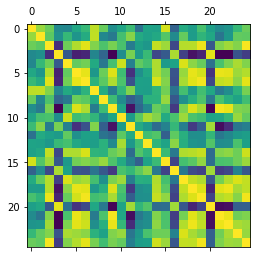

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.matshow(media_mobile_corr)

**Abbiamo 2 problemi da risolvere per ottenere un plot più leggibile**

**Problema 1:**

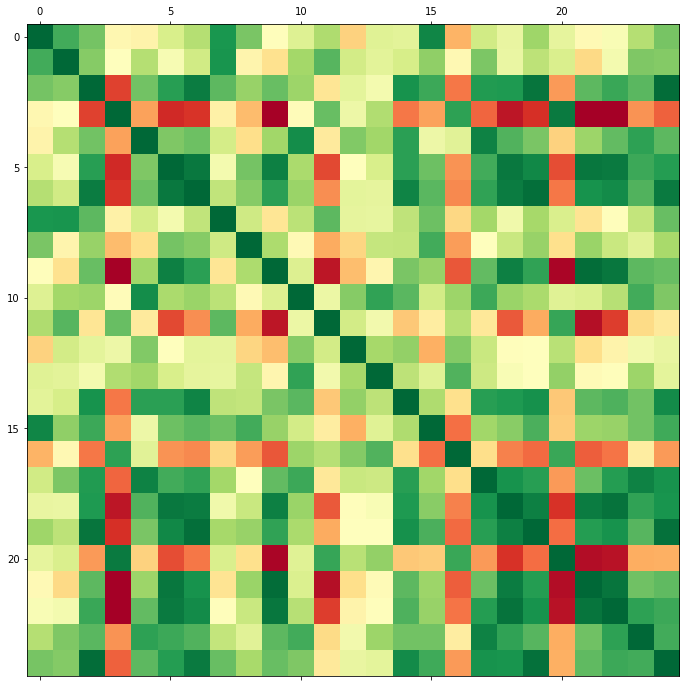

In [32]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # 1 by 1 Grind -> Number 1
ax.matshow(media_mobile_corr, cmap=plt.cm.RdYlGn)
plt.show()

/var/folders/lr/d8nq9v9x525g290h3kqjrbgw0000gn/T/ipykernel_96064/1784803565.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/var/folders/lr/d8nq9v9x525g290h3kqjrbgw0000gn/T/ipykernel_96064/1784803565.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


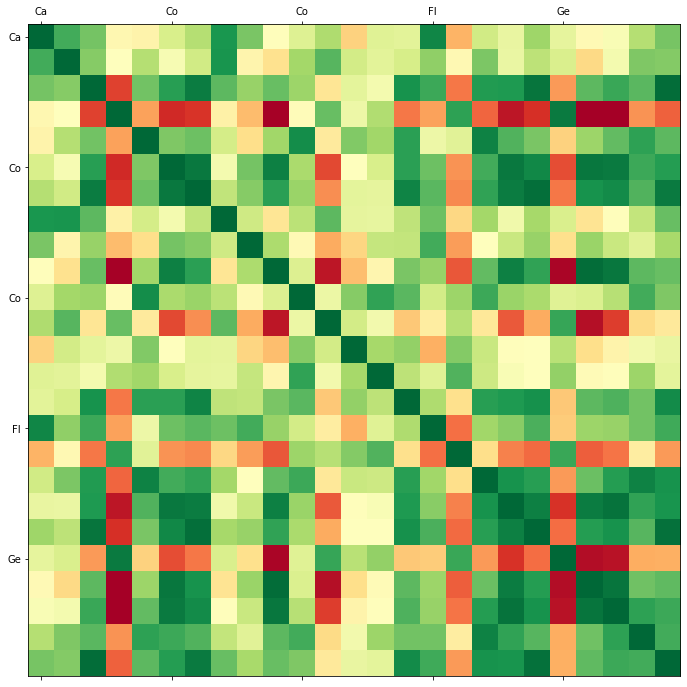

In [33]:
labels = [c[:2] for c in media_mobile_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # 1 by 1 Grind -> Number 1
ax.matshow(media_mobile_corr, cmap=plt.cm.RdYlGn)
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()

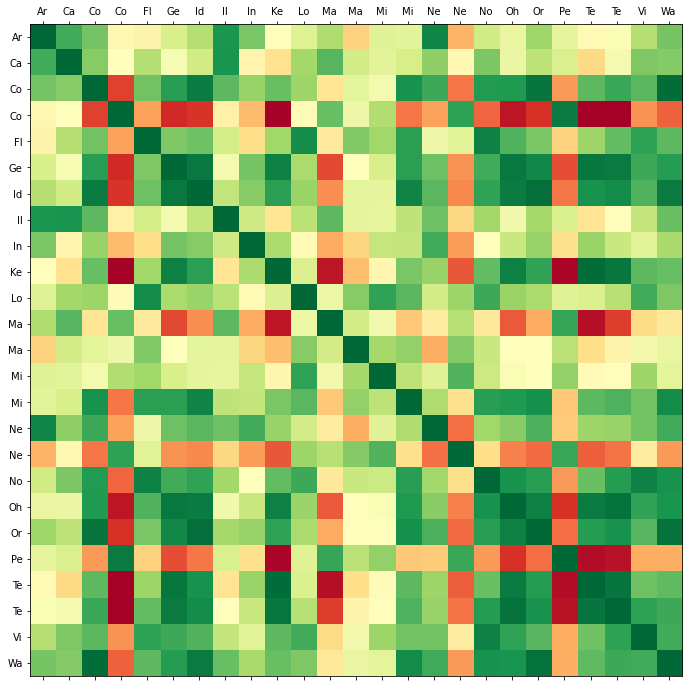

In [34]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # 1 by 1 Grind -> Number 1
ax.matshow(media_mobile_corr, cmap=plt.cm.RdYlGn)

ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()

**Ultimo problema**

Bisogna trovare un modo per mappare ogni stato con l'abbreviativo delle 2 lettere corrispondenti <br>

Colleghiamoci al sito [infoplease](https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes)

## Esercizio 6:
- Caricare la pagine infoplease all'interno della variabile states_abr (Suggerimento: abbiamo già utilizzato la funzione read_html)

In [35]:
states_postalcode = pd.read_html("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")

In [36]:
states_postalcode

[     State Name/District Postal Abbreviation Postal Code
 0                Alabama                Ala.          AL
 1                 Alaska              Alaska          AK
 2                Arizona               Ariz.          AZ
 3               Arkansas                Ark.          AR
 4             California              Calif.          CA
 5               Colorado               Colo.          CO
 6            Connecticut               Conn.          CT
 7               Delaware                Del.          DE
 8   District of Columbia                D.C.          DC
 9                Florida                Fla.          FL
 10               Georgia                 Ga.          GA
 11                Hawaii              Hawaii          HI
 12                 Idaho               Idaho          ID
 13              Illinois                Ill.          IL
 14               Indiana                Ind.          IN
 15                  Iowa                Iowa          IA
 16           

**Ci serve solo la prima parte del dataframe**

In [37]:
states_postalcode[0]

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [38]:
states_postalcode = states_postalcode[0]
states_postalcode.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


**Ora che abbiamo estratto delle informazioni possiamo salvarle in un file .csv <br>
In questo modo se in futuro dovremmo averne ancora bisogno abbiamo già il file pronto!**

In [40]:
states_postalcode.to_csv("../datasets/states_postalcode.csv", index=False)

In [43]:
states_postalcode = pd.read_csv("../datasets/states_postalcode.csv")
states_postalcode.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


**Possiamo anche caricare il dataset già con un index**

In [46]:
states_postalcode = pd.read_csv("../datasets/states_postalcode.csv", index_col=0)
states_postalcode.head()

,Postal Abbreviation,Postal Code
State Name/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


**E convertitlo in un dizionario, in questo modo sarà più semplice riutilizzarlo**

## Esercizio 7:
- salvare nella variabile "states_postalcode_dict" il dizionario con chiave l'index stato e valore "Postal Code"

In [47]:
states_postalcode_dict = states_postalcode[["Postal Code"]].to_dict()
states_postalcode_dict

{'Postal Code': {'Alabama': 'AL',
  'Alaska': 'AK',
  'Arizona': 'AZ',
  'Arkansas': 'AR',
  'California': 'CA',
  'Colorado': 'CO',
  'Connecticut': 'CT',
  'Delaware': 'DE',
  'District of Columbia': 'DC',
  'Florida': 'FL',
  'Georgia': 'GA',
  'Hawaii': 'HI',
  'Idaho': 'ID',
  'Illinois': 'IL',
  'Indiana': 'IN',
  'Iowa': 'IA',
  'Kansas': 'KS',
  'Kentucky': 'KY',
  'Louisiana': 'LA',
  'Maine': 'ME',
  'Maryland': 'MD',
  'Massachusetts': 'MA',
  'Michigan': 'MI',
  'Minnesota': 'MN',
  'Mississippi': 'MS',
  'Missouri': 'MO',
  'Montana': 'MT',
  'Nebraska': 'NE',
  'Nevada': 'NV',
  'New Hampshire': 'NH',
  'New Jersey': 'NJ',
  'New Mexico': 'NM',
  'New York': 'NY',
  'North Carolina': 'NC',
  'North Dakota': 'ND',
  'Ohio': 'OH',
  'Oklahoma': 'OK',
  'Oregon': 'OR',
  'Pennsylvania': 'PA',
  'Rhode Island': 'RI',
  'South Carolina': 'SC',
  'South Dakota': 'SD',
  'Tennessee': 'TN',
  'Texas': 'TX',
  'Utah': 'UT',
  'Vermont': 'VT',
  'Virginia': 'VA',
  'Washington': 'W

In [48]:
states_postalcode_dict = states_postalcode_dict["Postal Code"]
states_postalcode_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

## Esercizio 8:
- Per ogni colonna di media_mobile_corr estrai da states_postalcode_dict il Postal Code corrispondente e salvalo nella variabile "labels"

In [49]:
labels = [states_postalcode_dict[c] for c in media_mobile_corr.columns]
labels

['AZ',
 'CA',
 'CO',
 'CT',
 'FL',
 'GA',
 'ID',
 'IL',
 'IN',
 'KY',
 'LA',
 'MD',
 'MA',
 'MI',
 'MO',
 'NV',
 'NY',
 'NC',
 'OH',
 'OR',
 'PA',
 'TN',
 'TX',
 'VA',
 'WA']

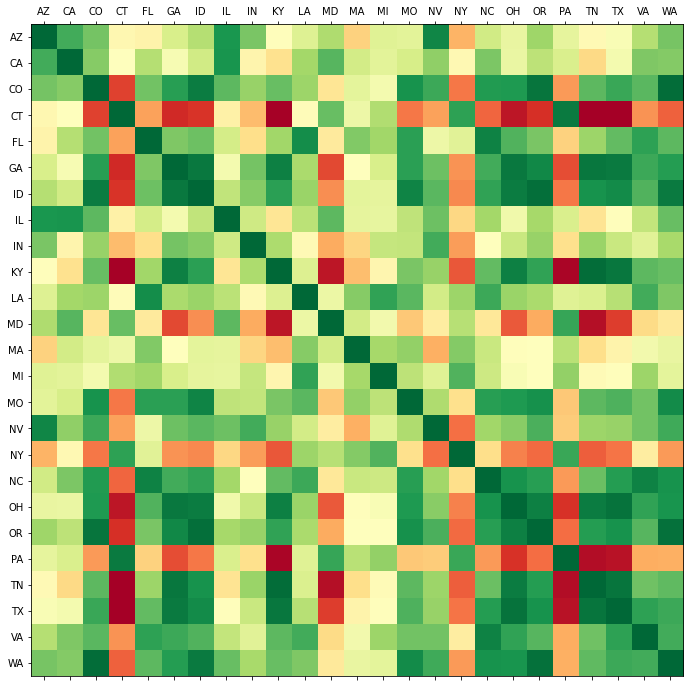

In [50]:
fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify
ax.matshow(media_mobile_corr, cmap=plt.cm.RdYlGn)  # display the matrix
ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!
ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

plt.show()

### Unione:

**Combining Dataset**

**Obbiettivo:** Trovare una correlazione tra il prezzo degli avocado, il salario minimo e il tasso di disoccupazione per un determinato stato.

**Disclaimer**: NON è detto che debba esistere una correlazione, ed è difficile giustificare i risultati o anche solo trarre qualsiasi conclusione, tutto ciò è esclusivamente stato fatto per mostrare le funzionalità di pandas

**CARICHIAMO IL DATASET: [US_unemployment](https://www.kaggle.com/jayrav13/unemployment-by-county-us)**

In [52]:
disocc_us_df = pd.read_csv("../datasets/US_unemployment.csv")
disocc_us_df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


**Controlliamo che il nostro dataset sulla media mobile non presenti valori nulli**

In [53]:
media_mobile_df.head()

,Arizona,California,Colorado,Connecticut,Florida,Georgia,Idaho,Illinois,Indiana,Kentucky,...,Nevada,New York,North Carolina,Ohio,Oregon,Pennsylvania,Tennessee,Texas,Virginia,Washington
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Esercizio 9:
- Eliminare tutte le righe con valori uguali a NaN

In [54]:
#Delate NaN
media_mobile_df.dropna(inplace=True)
media_mobile_df.head()

,Arizona,California,Colorado,Connecticut,Florida,Georgia,Idaho,Illinois,Indiana,Kentucky,...,Nevada,New York,North Carolina,Ohio,Oregon,Pennsylvania,Tennessee,Texas,Virginia,Washington
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-21,1.4896,1.4381,1.3172,2.2096,1.7624,1.669333,1.6488,1.6832,1.6620,1.5508,...,1.5576,1.785067,1.653333,1.3244,1.4812,1.721867,1.5960,1.2958,1.3856,1.6242
2015-06-28,1.5064,1.4564,1.3180,2.2092,1.7660,1.666400,1.6464,1.6908,1.6600,1.5512,...,1.5592,1.791333,1.649733,1.3304,1.4912,1.725733,1.5812,1.2952,1.3800,1.6348
2015-07-05,1.5208,1.4795,1.3236,2.2140,1.7655,1.660133,1.6760,1.6860,1.6312,1.5392,...,1.5616,1.801600,1.644533,1.3412,1.5196,1.736000,1.5536,1.2924,1.3732,1.6546
2015-07-12,1.5392,1.5018,1.3372,2.2152,1.7633,1.646800,1.7004,1.6800,1.6004,1.5268,...,1.5800,1.810533,1.637067,1.3488,1.5428,1.739867,1.5324,1.2916,1.3596,1.6828
2015-07-19,1.5516,1.5266,1.3420,2.2248,1.7526,1.636933,1.6856,1.6728,1.5688,1.5068,...,1.5904,1.821200,1.626667,1.3648,1.5436,1.745200,1.5132,1.2900,1.3508,1.6794


**I nostri dati sul tasso di disoccupazione sono forniti mensilmente, mentre il prezzo degli avocado viene fornito ogni tot giorni**

In [55]:
#GROUP BY DATE
media_mobile_df = media_mobile_df.groupby([media_mobile_df.index.year]).mean()
media_mobile_df.head()

,Arizona,California,Colorado,Connecticut,Florida,Georgia,Idaho,Illinois,Indiana,Kentucky,...,Nevada,New York,North Carolina,Ohio,Oregon,Pennsylvania,Tennessee,Texas,Virginia,Washington
Date,,,,,,,,,,,,,,,,,,,,,
2015,1.677286,1.734561,1.356929,2.277671,1.750636,1.684238,1.798300,1.659943,1.540300,1.488114,...,1.729014,1.818252,1.697662,1.466657,1.662429,1.754562,1.494786,1.323464,1.449071,1.780929
2016,1.725623,1.760948,1.201823,2.261400,1.591235,1.509208,1.419085,1.688523,1.464000,1.440315,...,1.747923,1.657672,1.597559,1.297931,1.462092,1.701308,1.341223,1.220962,1.393938,1.604423
2017,1.804272,2.068632,1.402060,2.299155,1.796545,1.553127,1.583849,1.847464,1.441343,1.389796,...,1.751826,1.800760,1.842289,1.364830,1.594083,1.768579,1.290257,1.263808,1.521834,1.838381
2018,1.776867,1.959575,1.751167,1.970433,1.836008,1.780189,2.091300,1.825133,1.495400,1.706067,...,1.939133,1.389389,1.989389,1.785200,2.062533,1.526022,1.732367,1.603983,1.552800,2.124917


**Carichiamo adesso il dataset sul salario minimo: [Minimum Wage Data](https://www.kaggle.com/lislejoem/us-minimum-wage-by-state-from-1968-to-2017)**

In [57]:
#Minimum Wave

data_us_df = pd.read_csv("../datasets/Minimum Wage Data.csv", encoding="Latin")
data_us_df.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


**Bisogna trasformarlo nello stesso formato del dataset _media_mobile_sd_, ovvero uno stato per ogni colonna e come riga il salario minimo per quel determinato anno**

In [58]:
salario_min_us_df = pd.DataFrame()

for name, group in data_us_df.groupby("State"):
    if salario_min_us_df.empty:
        salario_min_us_df = group.set_index("Year")[["Effective.Minimum.Wage.2020.Dollars"]].rename(columns={"Effective.Minimum.Wage.2020.Dollars":name})
    else:
        salario_min_us_df = salario_min_us_df.join(group.set_index("Year")[["Effective.Minimum.Wage.2020.Dollars"]].rename(columns={"Effective.Minimum.Wage.2020.Dollars":name}))

salario_min_us_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,8.55,15.61,8.55,8.55,12.26,8.55,10.41,9.29,9.29,8.55,...,8.55,8.55,8.55,8.55,10.41,8.55,11.89,8.55,9.29,8.92
1969,8.11,14.80,8.11,8.11,11.63,8.11,9.87,8.81,8.81,8.11,...,8.11,8.11,8.11,8.11,9.87,8.11,11.28,8.11,8.81,8.46
1970,8.67,14.00,8.67,8.67,11.00,8.67,10.67,8.67,10.67,8.67,...,8.67,8.67,8.67,8.67,10.67,8.67,10.67,8.67,8.67,8.67
1971,8.30,13.41,8.30,8.30,10.54,8.30,10.22,8.30,10.22,8.30,...,8.30,8.30,8.30,8.30,10.22,8.30,10.22,8.30,8.30,8.30
1972,9.90,12.99,9.90,9.90,10.21,9.90,11.45,9.90,9.90,9.90,...,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90


**C'è la possibilità che nel dataset ci siano dei valori uguali a 0, meglio eliminarli** 

In [59]:
salario_min_us_df = salario_min_us_df.replace(0, np.NaN).dropna(axis=1)
salario_min_us_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,8.55,15.61,8.55,8.55,12.26,8.55,10.41,9.29,9.29,8.55,...,8.55,8.55,8.55,8.55,10.41,8.55,11.89,8.55,9.29,8.92
1969,8.11,14.80,8.11,8.11,11.63,8.11,9.87,8.81,8.81,8.11,...,8.11,8.11,8.11,8.11,9.87,8.11,11.28,8.11,8.81,8.46
1970,8.67,14.00,8.67,8.67,11.00,8.67,10.67,8.67,10.67,8.67,...,8.67,8.67,8.67,8.67,10.67,8.67,10.67,8.67,8.67,8.67
1971,8.30,13.41,8.30,8.30,10.54,8.30,10.22,8.30,10.22,8.30,...,8.30,8.30,8.30,8.30,10.22,8.30,10.22,8.30,8.30,8.30
1972,9.90,12.99,9.90,9.90,10.21,9.90,11.45,9.90,9.90,9.90,...,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90


**IMPORTANTE**: Dobbiamo creare una funzione che ci restituisca il salario minimo dando in input un anno e un stato 

In [60]:
def get_salario_minimo(year, state):
    try:
        return salario_min_us_df.loc[year][state]
    except:
        return np.NaN

**TESTIAMO LA FUNZIONE:**

In [61]:
get_salario_minimo(2000, "Texas")

7.74

**Ora possiamo unire il dataset _disocc_us_df_ con il dataset _salario_min_us_df_ <br>
Per fare ciò aggiungeremo una colonna "min_wage" al dataset _disocc_us_df_**

In [62]:
 disocc_us_df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


**Per utilazzere la funzione precedentemente creata dobbiamo utilizzare il metodo map:**

In [63]:
%%time 

disocc_us_df["min_wage"] = list(map(get_salario_minimo, disocc_us_df["Year"], disocc_us_df["State"]))

CPU times: user 12.9 s, sys: 98.9 ms, total: 13 s
Wall time: 13.1 s


**Controlliamo il risultato:**

In [64]:
disocc_us_df.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,7.91
1,2015,February,Mississippi,Panola County,9.4,7.91
2,2015,February,Mississippi,Monroe County,7.9,7.91
3,2015,February,Mississippi,Hinds County,6.1,7.91
4,2015,February,Mississippi,Kemper County,10.6,7.91


**Verifichiamo se esiste una correlazione tra questi due dati**

In [65]:
disocc_us_df[["Rate", "min_wage"]].corr()

,Rate,min_wage
Rate,1.000000,0.291256
min_wage,0.291256,1.000000


**Come appena fatto per il salario minimo, dobbiamo aggiungere al dataframe _disocc_us_df_ una colonna che indichi il prezzo degli avocado per un determinato stato e anno**

## Esercizio 10:
- Creare una funzione che restituisca il prezzo degli avocado dando in input l'anno e lo stato

In [66]:
media_mobile_df.head()

,Arizona,California,Colorado,Connecticut,Florida,Georgia,Idaho,Illinois,Indiana,Kentucky,...,Nevada,New York,North Carolina,Ohio,Oregon,Pennsylvania,Tennessee,Texas,Virginia,Washington
Date,,,,,,,,,,,,,,,,,,,,,
2015,1.677286,1.734561,1.356929,2.277671,1.750636,1.684238,1.798300,1.659943,1.540300,1.488114,...,1.729014,1.818252,1.697662,1.466657,1.662429,1.754562,1.494786,1.323464,1.449071,1.780929
2016,1.725623,1.760948,1.201823,2.261400,1.591235,1.509208,1.419085,1.688523,1.464000,1.440315,...,1.747923,1.657672,1.597559,1.297931,1.462092,1.701308,1.341223,1.220962,1.393938,1.604423
2017,1.804272,2.068632,1.402060,2.299155,1.796545,1.553127,1.583849,1.847464,1.441343,1.389796,...,1.751826,1.800760,1.842289,1.364830,1.594083,1.768579,1.290257,1.263808,1.521834,1.838381
2018,1.776867,1.959575,1.751167,1.970433,1.836008,1.780189,2.091300,1.825133,1.495400,1.706067,...,1.939133,1.389389,1.989389,1.785200,2.062533,1.526022,1.732367,1.603983,1.552800,2.124917


In [67]:
def get_prezzo_avocado(year, state):
    try:
        return media_mobile_df.loc[year][state]
    except:
        return np.NaN

In [68]:
get_prezzo_avocado(2006, "Nevada")

nan

In [69]:
get_prezzo_avocado(2015, "Nevada")

1.7290142857142856

## Esercizio 11:
- Aggiungere al dataframe _disocc_us_df_ la colonna "avocado_price" utilizzando la funzione map

In [70]:
%%time 

disocc_us_df["avocado_price"] = list(map(get_prezzo_avocado, disocc_us_df["Year"], disocc_us_df["State"]))

CPU times: user 3.92 s, sys: 30.9 ms, total: 3.95 s
Wall time: 3.96 s


In [71]:
disocc_us_df.head()

,Year,Month,State,County,Rate,min_wage,avocado_price
0,2015,February,Mississippi,Newton County,6.1,7.91,NaN
1,2015,February,Mississippi,Panola County,9.4,7.91,NaN
2,2015,February,Mississippi,Monroe County,7.9,7.91,NaN
3,2015,February,Mississippi,Hinds County,6.1,7.91,NaN
4,2015,February,Mississippi,Kemper County,10.6,7.91,NaN


**Non abbiamo i dati per tutti gli stati**

In [72]:
disocc_us_df = disocc_us_df.dropna()
disocc_us_df

,Year,Month,State,County,Rate,min_wage,avocado_price
249,2015,February,Illinois,Monroe County,4.8,9.00,1.659943
250,2015,February,Illinois,Madison County,6.3,9.00,1.659943
251,2015,February,Illinois,Bond County,5.9,9.00,1.659943
252,2015,February,Illinois,Adams County,5.1,9.00,1.659943
253,2015,February,Illinois,Macoupin County,6.9,9.00,1.659943
...,...,...,...,...,...,...,...
102209,2016,November,Nevada,Lyon County,6.2,7.81,1.747923
102210,2016,November,Nevada,Churchill County,4.5,7.81,1.747923
102211,2016,November,Nevada,White Pine County,4.2,7.81,1.747923
102212,2016,November,Nevada,Clark County,5.2,7.81,1.747923


In [73]:
disocc_us_df[["Rate", "avocado_price"]].corr()

,Rate,avocado_price
Rate,1.000000,0.216749
avocado_price,0.216749,1.000000


In [74]:
disocc_us_df[["min_wage", "avocado_price"]].corr()

,min_wage,avocado_price
min_wage,1.000000,0.460282
avocado_price,0.460282,1.000000


**Correlazione non significa (quasi mai) causalità**, servirebbe un analisi più approfondità!

**Ultima analisi di correlazione:**
- C'è una corrlazione tra il salario minimo di uno stato e i risultati delle elezioni presidenziali del 2016?

**Importiamo il dataframe delle [elezione del 2016](https://www.kaggle.com/stevepalley/2016uspresidentialvotebycounty)**

In [78]:
risultati_elettorali = pd.read_csv("../datasets/pres16results.csv")
risultati_elettorali.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [79]:
risultati_elettorali.dropna().head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
159,Los Angeles County,6037,Hillary Clinton,CA,1.0,1654626.0,2314275.0,0.714965,Hillary Clinton
160,Los Angeles County,6037,Donald Trump,CA,1.0,542591.0,2314275.0,0.234454,Hillary Clinton
161,Los Angeles County,6037,Gary Johnson,CA,1.0,56905.0,2314275.0,0.024589,Hillary Clinton
162,Los Angeles County,6037,Jill Stein,CA,1.0,46682.0,2314275.0,0.020171,Hillary Clinton
163,Los Angeles County,6037,Gloria La Riva,CA,1.0,13471.0,2314275.0,0.005821,Hillary Clinton


**Confrontiamo i due datasets che dobbiamo unire**

In [80]:
disocc_us_df.tail()

,Year,Month,State,County,Rate,min_wage,avocado_price
102209,2016,November,Nevada,Lyon County,6.2,7.81,1.747923
102210,2016,November,Nevada,Churchill County,4.5,7.81,1.747923
102211,2016,November,Nevada,White Pine County,4.2,7.81,1.747923
102212,2016,November,Nevada,Clark County,5.2,7.81,1.747923
102213,2016,November,Nevada,Pershing County,4.7,7.81,1.747923


**Quale porzione del dataset ci interessa?**

In [81]:
disocc_us_df = disocc_us_df[(disocc_us_df['Year']==2015) & (disocc_us_df['Month']=="February")]

In [82]:
disocc_us_df.tail()

,Year,Month,State,County,Rate,min_wage,avocado_price
2781,2015,February,Nevada,Lyon County,10.2,7.91,1.729014
2782,2015,February,Nevada,Churchill County,7.4,7.91,1.729014
2783,2015,February,Nevada,White Pine County,6.2,7.91,1.729014
2784,2015,February,Nevada,Clark County,7.2,7.91,1.729014
2785,2015,February,Nevada,Pershing County,6.8,7.91,1.729014


**Se vogliamo unire i datasets i nomi degli stati devono corrispondere**

In [83]:
risultati_elettorali['st'].unique()

array(['US', 'CA', 'FL', 'TX', 'NY', 'PA', 'IL', 'OH', 'MI', 'NC', 'GA',
       'VA', 'NJ', 'MA', 'WI', 'MN', 'MO', 'WA', 'IN', 'CO', 'TN', 'MD',
       'SC', 'AL', 'AZ', 'LA', 'KY', 'OR', 'CT', 'IA', 'OK', 'MS', 'KS',
       'NV', 'AR', 'UT', 'NE', 'NM', 'ME', 'NH', 'WV', 'ID', 'MT', 'RI',
       'DE', 'HI', 'SD', 'ND', 'VT', 'DC', 'WY', 'AK', nan], dtype=object)

Dobbiamo convertire gli stati di disocc_us_df in POSTAL CODE

**Possiamo riutilizzare il dizionario che abbiamo creato prima!**

In [85]:
states_postalcode_df = pd.read_csv("../datasets/states_postalcode.csv", index_col = 0)
states_postalcode_df.head()

,Postal Abbreviation,Postal Code
State Name/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


**Ci interessano solo i Postal Code**

In [86]:
states_postalcode_df = states_postalcode_df[["Postal Code"]] #Con una sola parentersi quadra ritorna una Serie e non un dataframe
states_postalcode_df.head()

,Postal Code
State Name/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [87]:
states_postalcode_dict = states_postalcode_df.to_dict()["Postal Code"]
states_postalcode_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

Creiamo una nuova colonna del dataframe

In [88]:
disocc_us_df["State"] = disocc_us_df["State"].map(states_postalcode_dict)

/var/folders/lr/d8nq9v9x525g290h3kqjrbgw0000gn/T/ipykernel_96064/422372902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disocc_us_df["State"] = disocc_us_df["State"].map(states_postalcode_dict)


In [89]:
disocc_us_df.head()

,Year,Month,State,County,Rate,min_wage,avocado_price
249,2015,February,IL,Monroe County,4.8,9.0,1.659943
250,2015,February,IL,Madison County,6.3,9.0,1.659943
251,2015,February,IL,Bond County,5.9,9.0,1.659943
252,2015,February,IL,Adams County,5.1,9.0,1.659943
253,2015,February,IL,Macoupin County,6.9,9.0,1.659943


In [90]:
disocc_us_df["State"].unique()

array(['IL', 'IN', 'MD', 'LA', 'ID', 'TN', 'AZ', 'VA', 'OR', 'CT', 'CA',
       'MA', 'PA', 'KY', 'MO', 'OH', 'CO', 'WA', 'NC', 'NY', 'TX', 'NV'],
      dtype=object)

**Ora che i valori sono coerenti controlliamo che i nomi delle colonne corrispondano!**

In [91]:
risultati_elettorali.columns

Index(['county', 'fips', 'cand', 'st', 'pct_report', 'votes', 'total_votes',
       'pct', 'lead'],
      dtype='object')

In [92]:
disocc_us_df.columns

Index(['Year', 'Month', 'State', 'County', 'Rate', 'min_wage',
       'avocado_price'],
      dtype='object')

**PROBLEMA**: Il nome delle colonne County e State non corrispondono

In [93]:
risultati_elettorali.rename(columns={"county":"County", "st":"State"}, inplace=True)
risultati_elettorali.head()

,County,fips,cand,State,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


## Esercizio 12:
- Impostare "County" e "City" come indici per entrmabi i dataset!

In [94]:
for i_df in [disocc_us_df, risultati_elettorali]:
    i_df.set_index(["County", "State"], inplace = True)

In [95]:
disocc_us_df.head()

,,Year,Month,Rate,min_wage,avocado_price
County,State,,,,,
Monroe County,IL,2015,February,4.8,9.0,1.659943
Madison County,IL,2015,February,6.3,9.0,1.659943
Bond County,IL,2015,February,5.9,9.0,1.659943
Adams County,IL,2015,February,5.1,9.0,1.659943
Macoupin County,IL,2015,February,6.9,9.0,1.659943


In [96]:
risultati_elettorali.dropna().tail()

fips             cand  pct_report  votes  total_votes  \
County        State                                                           
King County   TX     48269       Jill Stein         1.0    0.0        159.0   
Loving County TX     48301     Donald Trump         1.0   57.0         64.0   
              TX     48301  Hillary Clinton         1.0    4.0         64.0   
              TX     48301       Jill Stein         1.0    2.0         64.0   
              TX     48301     Gary Johnson         1.0    1.0         64.0   

                          pct          lead  
County        State                          
King County   TX     0.000000  Donald Trump  
Loving County TX     0.890625  Donald Trump  
              TX     0.062500  Donald Trump  
              TX     0.031250  Donald Trump  
              TX     0.015625  Donald Trump

**Siamo interessati solo ai canditati principali cioè: Donald Trump e Hillary Clinton** <br>
**e alla percentuale di voto che hanno ricevuto**

In [97]:
risultati_elettorali_dt = risultati_elettorali[risultati_elettorali['cand'] == "Donald Trump"]
risultati_elettorali_dt = risultati_elettorali_dt[["pct"]]
risultati_elettorali_dt = risultati_elettorali_dt.rename(columns={'pct': 'pct_dt'})

risultati_elettorali_hc = risultati_elettorali[risultati_elettorali['cand'] == "Hillary Clinton"]
risultati_elettorali_hc = risultati_elettorali_hc[["pct"]]
risultati_elettorali_hc = risultati_elettorali_hc.rename(columns={'pct': 'pct_hc'})

**Eliminiamo i valori nulli**

In [98]:
risultati_elettorali_hc.dropna(inplace=True)
risultati_elettorali_hc.tail()

,,pct_hc
County,State,
Clark County,ID,0.155477
Arthur County,NE,0.060837
Kenedy County,TX,0.532258
King County,TX,0.031447
Loving County,TX,0.062500


**Siamo pronti a fare il merge dei due datasets!**

Iniziamo con il dataframe di Donald Trump!

In [99]:
merge_df = disocc_us_df.merge(risultati_elettorali_dt, on=["County", "State"])
merge_df.dropna(inplace=True)
merge_df.head()

,,Year,Month,Rate,min_wage,avocado_price,pct_dt
County,State,,,,,,
Monroe County,IL,2015,February,4.8,9.0,1.659943,0.661319
Madison County,IL,2015,February,6.3,9.0,1.659943,0.549600
Bond County,IL,2015,February,5.9,9.0,1.659943,0.654516
Adams County,IL,2015,February,5.1,9.0,1.659943,0.715518
Macoupin County,IL,2015,February,6.9,9.0,1.659943,0.648691


Ripetiamo l'operazione con il dataframe di Hillary Clinton

In [100]:
merge_df = merge_df.merge(risultati_elettorali_hc, on=["County", "State"])
merge_df.dropna(inplace=True)
merge_df.head()

,,Year,Month,Rate,min_wage,avocado_price,pct_dt,pct_hc
County,State,,,,,,,
Monroe County,IL,2015,February,4.8,9.0,1.659943,0.661319,0.289504
Madison County,IL,2015,February,6.3,9.0,1.659943,0.549600,0.393551
Bond County,IL,2015,February,5.9,9.0,1.659943,0.654516,0.276869
Adams County,IL,2015,February,5.1,9.0,1.659943,0.715518,0.240258
Macoupin County,IL,2015,February,6.9,9.0,1.659943,0.648691,0.298524


**La colonna "Year" è inutile essendo un dataframe del 2015**

In [101]:
merge_df.drop("Year", axis=1, inplace=True) #Axis = 1 Indica le colonne
merge_df.head()

,,Month,Rate,min_wage,avocado_price,pct_dt,pct_hc
County,State,,,,,,
Monroe County,IL,February,4.8,9.0,1.659943,0.661319,0.289504
Madison County,IL,February,6.3,9.0,1.659943,0.549600,0.393551
Bond County,IL,February,5.9,9.0,1.659943,0.654516,0.276869
Adams County,IL,February,5.1,9.0,1.659943,0.715518,0.240258
Macoupin County,IL,February,6.9,9.0,1.659943,0.648691,0.298524


In [102]:
merge_df.corr()

,Rate,min_wage,avocado_price,pct_dt,pct_hc
Rate,1.000000,0.254193,0.337960,-0.078470,0.090779
min_wage,0.254193,1.000000,0.475013,-0.409199,0.361791
avocado_price,0.337960,0.475013,1.000000,-0.232850,0.194842
pct_dt,-0.078470,-0.409199,-0.232850,1.000000,-0.988134
pct_hc,0.090779,0.361791,0.194842,-0.988134,1.000000


In [103]:
merge_df.cov()

,Rate,min_wage,avocado_price,pct_dt,pct_hc
Rate,4.635227,0.394777,0.133941,-0.026149,0.029238
min_wage,0.394777,0.520364,0.063077,-0.045688,0.039042
avocado_price,0.133941,0.063077,0.033886,-0.006634,0.005366
pct_dt,-0.026149,-0.045688,-0.006634,0.023956,-0.022880
pct_hc,0.029238,0.039042,0.005366,-0.022880,0.022379
